In [1]:
import pandas as pd 
import seaborn as sn

In [2]:
data =pd.read_csv("Cutlets.csv") 
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [4]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit A', ylabel='Density'>

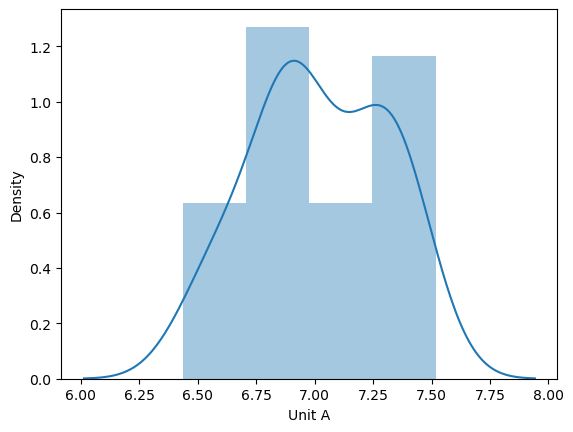

In [10]:
sn.distplot(data['Unit A'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit B', ylabel='Density'>

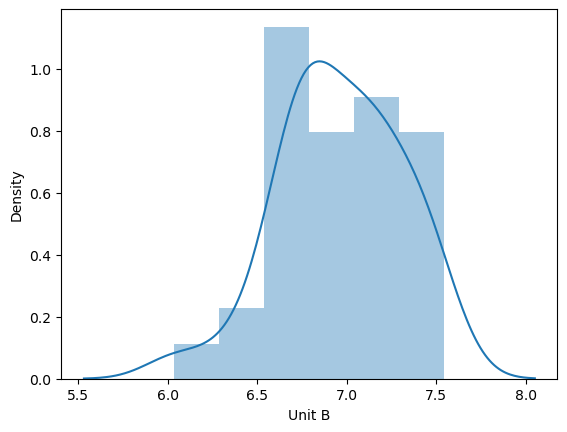

In [12]:
sn.distplot(data['Unit B'])

In [13]:
from scipy.stats import shapiro

stat, p_value_unit1 = shapiro(data['Unit A'])
stat, p_value_unit2 = shapiro(data['Unit B'])

In [14]:
print(stat, p_value_unit1)
print(stat, p_value_unit2)

0.9727305769920349 0.31998491287231445
0.9727305769920349 0.5225146412849426


p_value is greater than 0.05(assuming a 5% significance level), we may assume normality

In [17]:
from scipy.stats import levene

stat, p_value_variances = levene(data['Unit A'], data['Unit B'])

In [18]:
print(stat, p_value_variances)

0.6650897638632386 0.4176162212502553


p-value is greater than 0.05,so we may assume equal variances(Null hypothesis).

# two sample ttest

In [19]:
from scipy.stats import ttest_ind

stat, p_value_ttest = ttest_ind(data['Unit A'], data['Unit B'], equal_var=True)

In [20]:
print(stat, p_value_ttest)

0.7228688704678063 0.4722394724599501


according to p_value from the ttest which is greater than 0.05,so we accept null hypothesis. conclude that there is no significant difference in the diameter of the cutlet between the two units.